In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Set the style of seaborn
sns.set(style="whitegrid") 

### EDA: Understanding the Dataset 

Shape, missing values, data types, overview etc

In [5]:
# loading the dataset 
loan_data_df = pd.read_csv("../data/loan_default_dataset_kenya.csv")

In [6]:
# Overview of the dataset 
loan_data_df.head()

,Customer_ID,Age,Gender,Marital_Status,Employment_Status,Education_Level,Number_of_Dependents,Region,Account_Tenure_Years,Annual_Income,Loan_Amount,Loan_Term,Loan_Purpose,Credit_Score,Previous_Defaults,Existing_Loan_Count,Debt_to_Income_Ratio,Monthly_Installment,Late_Payments_Count,Default_Status
0,C001,58,Female,Single,Employed,Diploma,3,Nairobi,17,2910864,1803901,48,Business,643,0,1,0.62,37581.27,0,0
1,C002,48,Male,Widowed,Unemployed,Secondary,2,Nairobi,10,4543699,1419930,24,Medical,594,0,2,0.31,59163.75,1,1
2,C003,34,Male,Single,Unemployed,Secondary,0,Eldoret,20,3910879,1711066,48,Business,818,0,0,0.44,35647.21,1,0
3,C004,62,Female,Divorced,Unemployed,Masters,1,Nairobi,11,3335609,1372954,36,Medical,834,1,1,0.41,38137.61,0,0
4,C005,27,Male,Single,Self-Employed,PhD,3,Nairobi,4,1135783,758970,36,Education,526,0,1,0.67,21082.50,0,1


In [7]:
# Cehcking the data types of the columns
loan_data_df.dtypes

Customer_ID              object
Age                       int64
Gender                   object
Marital_Status           object
Employment_Status        object
Education_Level          object
Number_of_Dependents      int64
Region                   object
Account_Tenure_Years      int64
Annual_Income             int64
Loan_Amount               int64
Loan_Term                 int64
Loan_Purpose             object
Credit_Score              int64
Previous_Defaults         int64
Existing_Loan_Count       int64
Debt_to_Income_Ratio    float64
Monthly_Installment     float64
Late_Payments_Count       int64
Default_Status            int64
dtype: object

In [8]:
# Checking for missing values in the dataset
loan_data_df.isnull().sum()

Customer_ID             0
Age                     0
Gender                  0
Marital_Status          0
Employment_Status       0
Education_Level         0
Number_of_Dependents    0
Region                  0
Account_Tenure_Years    0
Annual_Income           0
Loan_Amount             0
Loan_Term               0
Loan_Purpose            0
Credit_Score            0
Previous_Defaults       0
Existing_Loan_Count     0
Debt_to_Income_Ratio    0
Monthly_Installment     0
Late_Payments_Count     0
Default_Status          0
dtype: int64

In [9]:
# Checking the shape of the dataset
loan_data_df.shape

(500, 20)

In [10]:
# Checking the columns of the dataset
loan_data_df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Marital_Status', 'Employment_Status',
       'Education_Level', 'Number_of_Dependents', 'Region',
       'Account_Tenure_Years', 'Annual_Income', 'Loan_Amount', 'Loan_Term',
       'Loan_Purpose', 'Credit_Score', 'Previous_Defaults',
       'Existing_Loan_Count', 'Debt_to_Income_Ratio', 'Monthly_Installment',
       'Late_Payments_Count', 'Default_Status'],
      dtype='object')

### Business Questions

1. Which customer segments have the highest default rates? - Segmentation by variables like employment status, education level, region, or age group.

2. How does the credit score impact the likelihood of loan default? - Is there a threshold below which default rates spike?

3. What is the relatinship between Debt-to-Income Ratio and loan default? - is there a critical DTI level that signals higher risks

4. Do existing loans or previous defaults significantly increase the risk of new defaults?

5. Which loan purposes are most commonly associated with loan defaults?

6. Can we build a predictinve mode to identify high-risk loan applicants before disbursements? - Using key variables like Credit Score, Income, and Loan Amount?

#### 1. Customers Segments with the Highest Default Rate 

In [13]:
loan_data_df.head() 

# Filter all loans that have defaulted
# A loan is considered defaulted if the Default_Status column is 1
defaulted_loans_df = loan_data_df[loan_data_df.Default_Status == 1]
defaulted_loans_df.head()

,Customer_ID,Age,Gender,Marital_Status,Employment_Status,Education_Level,Number_of_Dependents,Region,Account_Tenure_Years,Annual_Income,Loan_Amount,Loan_Term,Loan_Purpose,Credit_Score,Previous_Defaults,Existing_Loan_Count,Debt_to_Income_Ratio,Monthly_Installment,Late_Payments_Count,Default_Status
1,C002,48,Male,Widowed,Unemployed,Secondary,2,Nairobi,10,4543699,1419930,24,Medical,594,0,2,0.31,59163.75,1,1
4,C005,27,Male,Single,Self-Employed,PhD,3,Nairobi,4,1135783,758970,36,Education,526,0,1,0.67,21082.50,0,1
6,C007,58,Female,Divorced,Unemployed,Diploma,0,Nairobi,8,3106492,2317721,12,Medical,622,2,0,0.75,193143.42,0,1
8,C009,42,Male,Divorced,Self-Employed,Degree,1,Nairobi,18,3734150,1908004,48,Mortgage,671,0,0,0.51,39750.08,0,1
10,C011,30,Male,Married,Unemployed,Secondary,0,Nairobi,6,3446434,1410690,60,Personal,678,2,0,0.41,23511.50,0,1


In [20]:
# Check default rate by employment status 
default_rate_by_employment_status = defaulted_loans_df.Employment_Status.value_counts(normalize=True) * 100 

# Create a DataFrame from the Series 
default_rate_by_employment_status = default_rate_by_employment_status.reset_index() 

# Rename the columns 
default_rate_by_employment_status.columns = ['Employment_Status', 'Default_Rate']

# Overview of the default rate by employment status 
default_rate_by_employment_status.head()

,Employment_Status,Default_Rate
0,Unemployed,39.873418
1,Employed,32.278481
2,Self-Employed,27.848101


Text(0.5, 1.0, 'Default Rate by Employment Status')

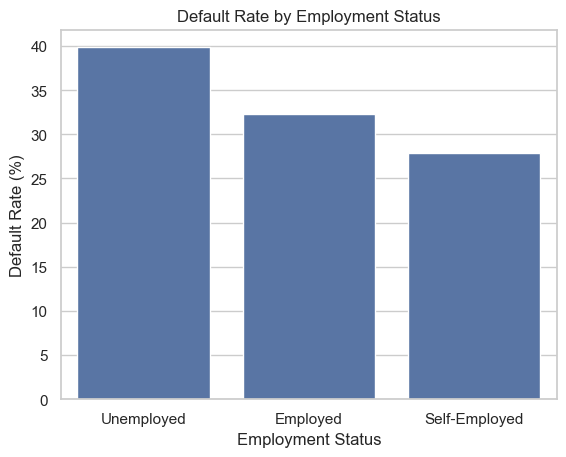

In [25]:
# Create a bar plot of the default rate by employment status

sns.barplot(default_rate_by_employment_status, x='Employment_Status', y='Default_Rate',)

# Renaming the x-axis and y-axis labels 
plt.xlabel('Employment Status')
plt.ylabel('Default Rate (%)') 

# Renaming the title of the plot
plt.title('Default Rate by Employment Status')

#### Data storytelling

- The plot shows the default rate by employment status.

- The default rate is highest for the unemployed category, followed by the employed category.

- The self-employed category has the lowest default rate.

- This indicates that employment status is a significant factor in determining the likelihood of defaulting on a loan.

- The unemployed category has the highest default rate, which is expected as they may have difficulty repaying loans without a steady income.